<h1>Titanic Disaster Survival Using Classification Algorithms</h1>

End term project by

Shruti Gupta - 19CSU424

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Load the Data**

Loading data

In [2]:
titanic_data=pd.read_csv('titanic_train.csv')

In [3]:
len(titanic_data)

891

**View the data using head function which returns top  rows**

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.index

RangeIndex(start=0, stop=891, step=1)

In [6]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Explaining Dataset**

survival : Survival 0 = No, 1 = Yes <br>
pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd <br>
sex : Sex <br>
Age : Age in years <br>
sibsp : Number of siblings / spouses aboard the Titanic 
<br>parch # of parents / children aboard the Titanic <br>
ticket : Ticket number fare Passenger fare cabin Cabin number <br>
embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton <br>




<h1>Data Analysis

**Import Seaborn for visually analysing the data**

**Find out how many survived vs Died using countplot method of seaboarn**

Countplot of survived vs not  survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

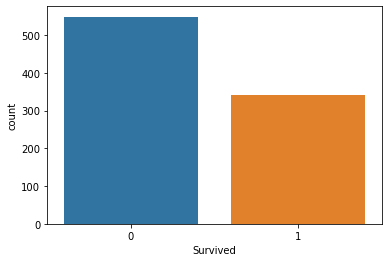

In [10]:
sns.countplot(x='Survived',data=titanic_data)

**Male vs Female Survival**

Male vs Female Survived?

<AxesSubplot:xlabel='Survived', ylabel='count'>

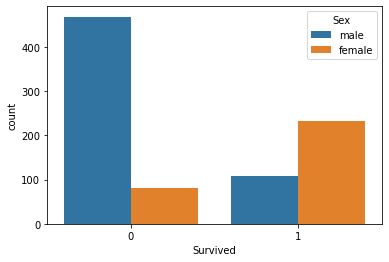

In [11]:
sns.countplot(x='Survived',data=titanic_data,hue='Sex')

Checking for null values

In [12]:
titanic_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Checking the count of null values

In [13]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Visualize null values

<AxesSubplot:>

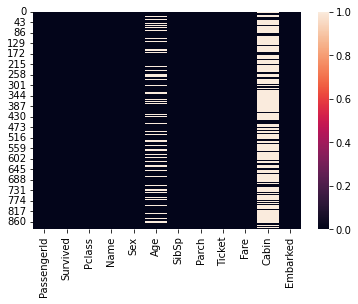

In [14]:
sns.heatmap(titanic_data.isna())

Find the % of null values in age column

In [15]:
(titanic_data['Age'].isna().sum()/len(titanic_data['Age']))*100

19.865319865319865

Find the % of null values in cabin column

In [16]:
(titanic_data['Cabin'].isna().sum()/len(titanic_data['Cabin']))*100

77.10437710437711

<h1>Data Cleaning

**Fill the missing values**<br> we will fill the missing values for age. In order to fill missing values we use fillna method.<br> For now we will fill the missing age by taking average of all age 

In [17]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

**We can verify that no more null data exist** <br> we will examine data by isnull mehtod which will return nothing

Null values handled successfully. Verifying.

In [18]:
titanic_data['Age'].isna().sum()

0

**Alternatively we will visualise the null value using heatmap**<br>
we will use heatmap method by passing only records which are null. 

Visualizing null values

<AxesSubplot:>

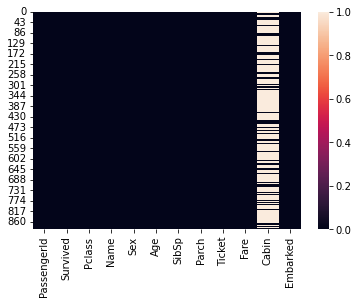

In [19]:
sns.heatmap(titanic_data.isna())

Modifying the age column to categories

0-3 -> Infants, 3-13 -> Children, 13-20 -> Teenagers, 20-50 -> Adults, >=50 -> Old

In [20]:
bins= [0,3,13,20,50,90]
labels = ['Infant','Kid','Teen','Adult','Old']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels, right=False)

In [21]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


### Encoding for AgeGroup

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()
titanic_data['AgeGroup'] = le.fit_transform(titanic_data['AgeGroup'])

In [24]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


**We can see cabin column has a number of null values, as such we can not use it for prediction. Hence we will drop it**

In [25]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [26]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


**Preaparing Data for Model**<br>
No we will require to convert all non-numerical columns to numeric. Please note this is required for feeding data into model. Lets see which columns are non numeric info describe method

In [27]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  AgeGroup     891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


In [28]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
AgeGroup         int32
dtype: object

**We can see, Name, Sex, Ticket and Embarked are non-numerical.It seems Name,Embarked and Ticket number are not useful for Machine Learning Prediction hence we will eventually drop it. For Now we would convert Sex Column to dummies numerical values******

In [29]:
gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [30]:
titanic_data['Gender']=gender

In [31]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


In [32]:
#drop the columns which are not required

In [33]:
titanic_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [34]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeGroup,Gender
0,1,0,3,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,26.0,0,0,7.9250,0,0
3,4,1,1,35.0,1,0,53.1000,0,0
4,5,0,3,35.0,0,0,8.0500,0,1


Seperating Dependent and Independent variables

In [35]:
x=titanic_data[['Pclass','AgeGroup','SibSp','Parch','Gender']]
y=titanic_data['Survived']

In [36]:
x = pd.get_dummies(x, columns = ["AgeGroup"])
x

,Pclass,SibSp,Parch,Gender,AgeGroup_0,AgeGroup_1,AgeGroup_2,AgeGroup_3,AgeGroup_4
0,3,1,0,1,1,0,0,0,0
1,1,1,0,0,1,0,0,0,0
2,3,0,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0
4,3,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
886,2,0,0,1,1,0,0,0,0
887,1,0,0,0,0,0,0,0,1
888,3,1,2,0,1,0,0,0,0
889,1,0,0,1,1,0,0,0,0


In [37]:
x.drop(["AgeGroup_0"],axis=1, inplace=True)
x

,Pclass,SibSp,Parch,Gender,AgeGroup_1,AgeGroup_2,AgeGroup_3,AgeGroup_4
0,3,1,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0
4,3,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
886,2,0,0,1,0,0,0,0
887,1,0,0,0,0,0,0,1
888,3,1,2,0,0,0,0,0
889,1,0,0,1,0,0,0,0


In [38]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<h1>Data Modelling

**Building Model using Logestic Regression**

**Build the model**

In [39]:
#import train test split method

In [40]:
from sklearn.model_selection import train_test_split

Spliting the data into training and testing data

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [42]:
#import Logistic  Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
#Fit Logistic Regression 

In [45]:
lr=LogisticRegression()

In [46]:
lr.fit(x_train,y_train)

LogisticRegression()

Data Prediction

In [47]:
y_pred=lr.predict(x_test)

<h1>Testing

**See how our model is performing**

Print confusion matrix 

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [49]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,155,20
Actual Yes,33,87


In [50]:
#import classification report

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       175
           1       0.81      0.72      0.77       120

    accuracy                           0.82       295
   macro avg       0.82      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295



**Precision is fine considering Model Selected and Available Data. Accuracy can be increased by further using more features (which we dropped earlier) and/or  by using other model**

Note: <br>
Precision : Precision is the ratio of correctly predicted positive observations to the total predicted positive observations <br>
Recall : Recall is the ratio of correctly predicted positive observations to the all observations in actual class
F1 score - F1 Score is the weighted average of Precision and Recall.



In [53]:
ac_LR = accuracy_score(y_test,y_pred)

In [54]:
print("The accuracy by using Logistic regression is:",ac_LR)

The accuracy by using Logistic regression is: 0.8203389830508474


## Applying KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)


In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       175
           1       0.81      0.62      0.70       120

    accuracy                           0.79       295
   macro avg       0.79      0.76      0.77       295
weighted avg       0.79      0.79      0.78       295



In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
ac_KNN = accuracy_score(y_test,y_pred)
cr = classification_report(y_test, y_pred)

In [58]:
pd.DataFrame(cm,columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,158,17
Actual Yes,46,74


In [59]:
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       175
           1       0.81      0.62      0.70       120

    accuracy                           0.79       295
   macro avg       0.79      0.76      0.77       295
weighted avg       0.79      0.79      0.78       295



In [60]:
print("The accuracy by using KNN is:",ac_KNN)

The accuracy by using KNN is: 0.7864406779661017


## Applying Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [62]:
y_pred  =  classifier.predict(x_test)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       175
           1       0.83      0.75      0.79       120

    accuracy                           0.83       295
   macro avg       0.83      0.82      0.83       295
weighted avg       0.83      0.83      0.83       295



In [64]:
cm = confusion_matrix(y_test, y_pred)
ac_NB = accuracy_score(y_test,y_pred)
cr = classification_report(y_test, y_pred)

In [65]:
pd.DataFrame(cm,columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,156,19
Actual Yes,30,90


In [66]:
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       175
           1       0.83      0.75      0.79       120

    accuracy                           0.83       295
   macro avg       0.83      0.82      0.83       295
weighted avg       0.83      0.83      0.83       295



In [67]:
print("The accuracy by using Naive Bayes is:",ac_NB)

The accuracy by using Naive Bayes is: 0.8338983050847457


### Applying Decision Trees

In [68]:
from sklearn.tree import DecisionTreeClassifier 

In [69]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [70]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm,columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,157,18
Actual Yes,35,85


In [71]:
# Classification report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       175
           1       0.83      0.71      0.76       120

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.81       295
weighted avg       0.82      0.82      0.82       295



In [72]:
# Accuracy

ac_DT = accuracy_score(y_test, y_pred)
print("The accuracy by using Decision Tree is::",ac_DT)

The accuracy by using Decision Tree is:: 0.8203389830508474


### Plot of accuracies

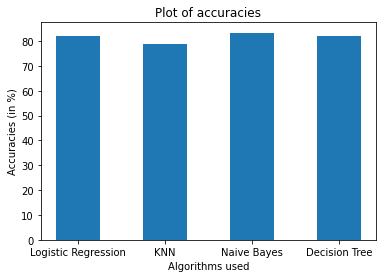

In [73]:
plt.bar(["Logistic Regression", "KNN", "Naive Bayes", "Decision Tree"],[ac_LR*100, ac_KNN*100, ac_NB*100, ac_DT*100], width=0.5)
plt.xlabel("Algorithms used")
plt.ylabel("Accuracies (in %)")
plt.title("Plot of accuracies")
plt.show()